In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

In [2]:
def read_data(path):
    with open(path, 'r', encoding='utf-8') as f:
        data = [json.loads(line) for line in f]
    df = pd.DataFrame(data)
    return df

In [3]:
train_df = read_data('../data/SubtaskA/subtaskA_train_multilingual.jsonl')
dev_df   = read_data('../data/SubtaskA/subtaskA_dev_multilingual.jsonl')

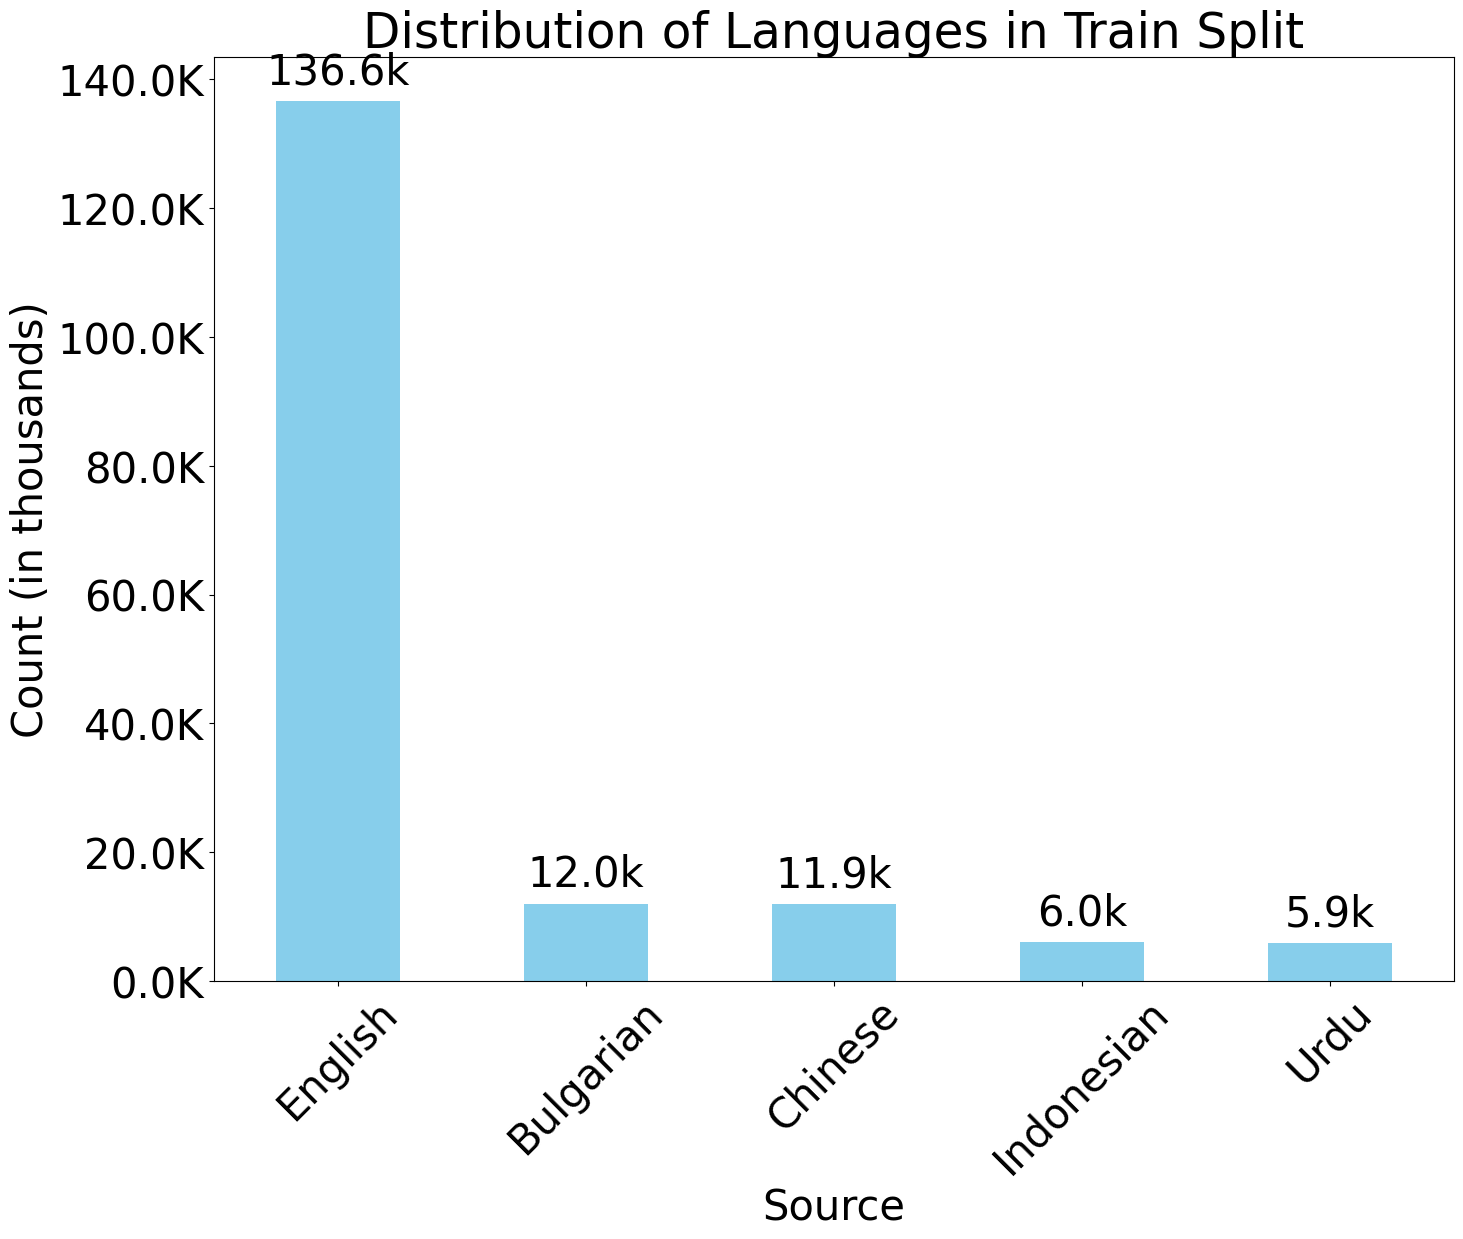

In [4]:
import matplotlib.ticker as mtick  # Import the formatter for y-axis ticks

# Assuming 'train_df' is your DataFrame and 'column_name' is the column for which you want to plot value counts
column_name = 'source'
value_counts = train_df[column_name].str.capitalize().replace({k:'English' for k in 'Wikihow Reddit Arxiv Peerread Wikipedia'.split()}).value_counts()

# Set font sizes
plt.rc('font', size=30)  # Default font size
plt.rc('axes', titlesize=35)  # Title font size
plt.rc('xtick', labelsize=30)  # X-axis tick label font size
plt.rc('ytick', labelsize=30)  # Y-axis tick label font size

# Plotting
fig, ax = plt.subplots(figsize=(16, 12))
bars = value_counts.plot(kind='bar', color='skyblue')

# Add data annotations above each bar in thousands
for bar in bars.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01 * max(value_counts),
            f'{yval / 1000:.1f}k', ha='center', va='bottom', fontsize=30, color='black')

# Define a function to format ticks in thousands
def format_thousands(value, _):
    return f'{value / 1000:.1f}K'

# Set the y-axis major formatter to the custom formatter
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.title(f'Distribution of Languages in Train Split')
plt.xlabel('Source')
plt.ylabel('Count (in thousands)')
plt.xticks(rotation=45)
plt.savefig('train_freq.png', bbox_inches='tight', dpi=500)
plt.show()

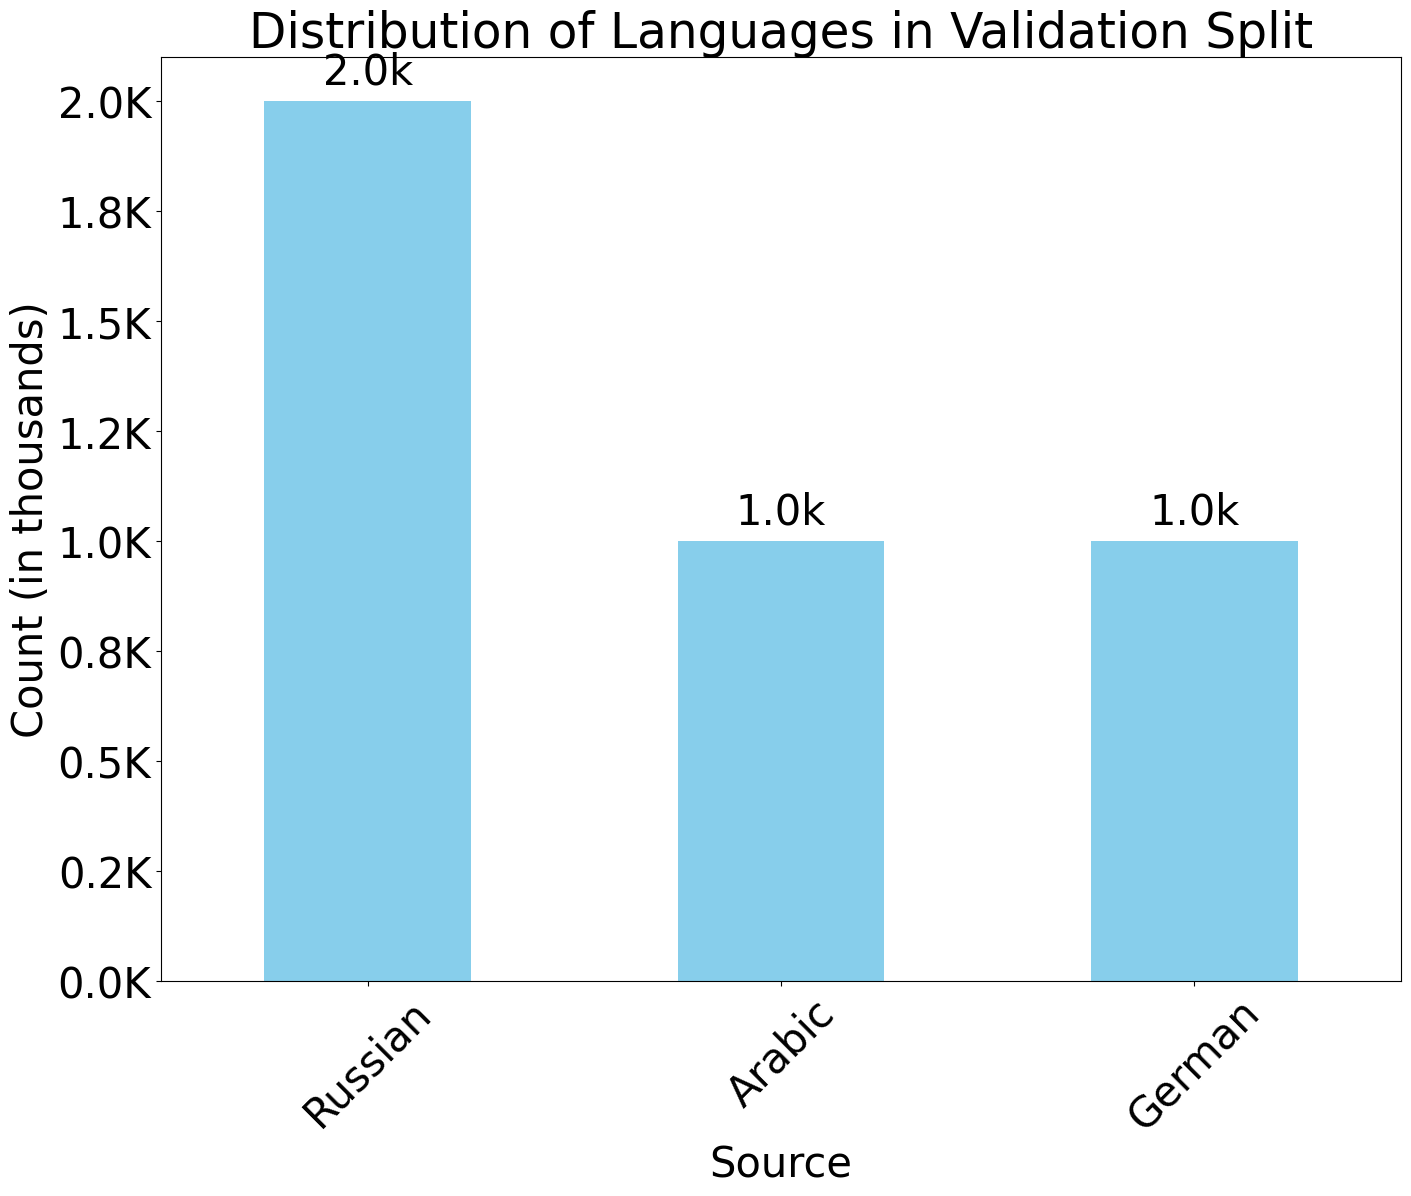

In [5]:
import matplotlib.ticker as mtick  # Import the formatter for y-axis ticks

# Assuming 'train_df' is your DataFrame and 'column_name' is the column for which you want to plot value counts
column_name = 'source'
value_counts = dev_df[column_name].str.capitalize().replace({k:'English' for k in 'Wikihow Reddit Arxiv Peerread Wikipedia'.split()}).value_counts()

# Set font sizes
plt.rc('font', size=30)  # Default font size
plt.rc('axes', titlesize=35)  # Title font size
plt.rc('xtick', labelsize=30)  # X-axis tick label font size
plt.rc('ytick', labelsize=30)  # Y-axis tick label font size

# Plotting
fig, ax = plt.subplots(figsize=(16, 12))
bars = value_counts.plot(kind='bar', color='skyblue')

# Add data annotations above each bar in thousands
for bar in bars.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01 * max(value_counts),
            f'{yval / 1000:.1f}k', ha='center', va='bottom', fontsize=30, color='black')

# Define a function to format ticks in thousands
def format_thousands(value, _):
    return f'{value / 1000:.1f}K'

# Set the y-axis major formatter to the custom formatter
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.title(f'Distribution of Languages in Validation Split')
plt.xlabel('Source')
plt.ylabel('Count (in thousands)')
plt.xticks(rotation=45)
plt.savefig('dev_freq.png', bbox_inches='tight', dpi=500)
plt.show()